# Capstone Webscrapping using BeautifulSoup

Oleh Fattah Diwangkara Mahariadi

## background

Pada projek ini, saya akan menggunakan beautifulsoup untuk menscrapping data dari website coingecko untuk melihat volume penjualan pada Ethereum. Data yang akan di scrap adalah tanggal (Date) dan Volume.

## Requesting the Data and Creating a BeautifulSoup

Kita memulai dengan menggunakan metode `get` untuk meminta request dari website.

In [2]:
import requests

url_get = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data?end_date=2022-07-08&start_date=2021-07-08#panel', headers = { 'User-Agent': 'Popular browser\'s user-agent', })

Penambahan kode `headers = { 'User-Agent': 'Popular browser\'s user-agent', }` pada request digunakan karena sistem keamanan pada website yang sudah ditingkatkan sehingga perlu menambahkan kode tersebut. Untuk memvisualisasikan apa yang sebenarnya saya dapatkan dari `request.get`, kita dapat menggunakan .content jadi lihat apa yang sebenarnya kita dapatkan, di sini saya mengirisnya sehingga tidak membuat layar kita penuh dengan html yang kita dapatkan dari halaman.

In [3]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<script src="/cdn-cgi/apps/head/gYtXOyllgyP3-Z2iKTP8rRWGBm4.js"></script><script async defer src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992"></script>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<link rel="shortcut icon" href="/favicon.ico">\n<link type="application/opensearchdescription+xml" rel="search" href="/OpensearchDescription.xml" '

Seperti terlihat bahwa output html didapat sangat tidak terstruktur dan kompleks, yang sebenarnya berisi kode yang diperlukan untuk menampilkan halaman web di browser web Anda. Sehingga kita dapat menggunakan BeautifulSoup. BeautifulSoup mengubah dokumen HTML kompleks menjadi pohon kompleks objek Python. 

Untuk menggunakan BeautifulSoup, dilakukan import BeautifulSoup from bs4 dan dapat di assign konten ke objek beautiful soup dengan "soup'

In [4]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Untuk mencari dan mengidentifikasi data yang ingin di scrap, gunakan metode `.find()` pada objek soup

In [5]:
table = soup.find('table', attrs={'class':'table table-striped text-sm text-lg-normal'})
print(table.prettify()[1:500])

table class="table table-striped text-sm text-lg-normal">
 <thead>
  <tr>
   <th class="text-center">
    Date
   </th>
   <th class="text-center">
    Market Cap
   </th>
   <th class="text-center">
    Volume
   </th>
   <th class="text-center">
    Open
   </th>
   <th class="text-center">
    Close
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <th class="font-semibold text-center" scope="row">
    2022-07-08
   </th>
   <td class="text-center">
    $148,622,605,231
   </td>
   <td class="te


Dari output yang didapat, Date pada tag 'th' dengan class nya "font-semibold text-center" dan Volume didapatkan tag 'td' dengan class "text-center".

In [6]:
table.find_all('th', attrs={'class':'font-semibold text-center'})

[<th class="font-semibold text-center" scope="row">2022-07-08</th>,
 <th class="font-semibold text-center" scope="row">2022-07-07</th>,
 <th class="font-semibold text-center" scope="row">2022-07-06</th>,
 <th class="font-semibold text-center" scope="row">2022-07-05</th>,
 <th class="font-semibold text-center" scope="row">2022-07-04</th>,
 <th class="font-semibold text-center" scope="row">2022-07-03</th>,
 <th class="font-semibold text-center" scope="row">2022-07-02</th>,
 <th class="font-semibold text-center" scope="row">2022-07-01</th>,
 <th class="font-semibold text-center" scope="row">2022-06-30</th>,
 <th class="font-semibold text-center" scope="row">2022-06-29</th>,
 <th class="font-semibold text-center" scope="row">2022-06-28</th>,
 <th class="font-semibold text-center" scope="row">2022-06-27</th>,
 <th class="font-semibold text-center" scope="row">2022-06-26</th>,
 <th class="font-semibold text-center" scope="row">2022-06-25</th>,
 <th class="font-semibold text-center" scope="ro

In [7]:
table.find_all('th', attrs={'class':'font-semibold text-center'})[0].text

'2022-07-08'

In [8]:
table.find_all('td', attrs={'class':'text-center'})[:3]

[<td class="text-center">
 $148,622,605,231
 </td>,
 <td class="text-center">
 $13,170,522,513
 </td>,
 <td class="text-center">
 $1,240.38
 </td>]

Informasi "Volume" seharusnya milik tag 'td' dengan kelas 'text-center', tetapi begitu juga dengan "Market Cap", "Open", dan "Close". Ini adalah masalah yang perlu ditangani.

In [9]:
table.find_all('td', attrs={'class':'text-center'})[1].text

'\n$13,170,522,513\n'

In [10]:
table.find_all('td', attrs={'class':'text-center'})[5].text

'\n$14,422,132,962\n'

Finding row length.

Selanjutnya, saya perlu mengetahui panjang baris untuk dapat menginisialisasi loop. Dalam mencari panjang baris, saya akan tetap menggunakan kolom "Tanggal" sebagai titik fokus dari upaya penghapusan ini.

In [11]:
date_row = table.find_all('th', attrs={'class':'font-semibold text-center'})
date_row_length = len(date_row)
date_row_length

60

Ketika saya melihat tag lain yang terdiri dari beberapa kolom, saya menemukan bahwa ada empat kali lipat jumlah baris daripada 'Date':

In [12]:
others_row = table.find_all('td', attrs={'class':'text-center'})
others_row_length = len(others_row)
others_row_length

240

Apa yang harus saya lakukan untuk menghapus hanya kolom Volume? Karena mereka berada di baris yang sama meskipun Date hanya memiliki 1 kolom dan Volume milik kolom kedua dari 4 kolom. Saya dapat membayangkan bahwa mereka memiliki beberapa hubungan matematis yang dapat diketahui.

Mari kita lihat polanya:

Di baris ke-1: Date termasuk dalam indeks ke-[0], dan Volume milik indeks ke-t [1]

Di baris ke-2: Date termasuk dalam indeks ke-[1], dan Volume milik indeks ke-t [5]

Di baris ke-3: Date termasuk dalam indeks th [2], dan Volume termasuk dalam indeks td [9]

Di baris ke-4: Date termasuk dalam indeks ke-[3], dan Volume milik indeks ke-t [13]

Sehingga dapat dinyatakan bahwa

Date ~ Volume = Date ~ (Tanggal * 4) + 1
Jika saya mengulang Date dengan i maka saya perlu mengulang Volume dengan (i * 4) + 1

Do the scrapping process here (please change this markdown with your explanation)

In [13]:
temp = [] #initialize a vessel to lay down the scrapped data

for i in range(0, date_row_length):

    # scrapping process
    # get date
    date = table.find_all('th', attrs={'class':'font-semibold text-center'})[i].text
    # get volume
    # clean the ' ', '\n', ',', and '$' while at it 
    vol = table.find_all('td', attrs={'class':'text-center'})[(i*4)+1].text.replace("\n","").replace(",","").replace("$","").replace(" ","")
    temp.append((date,vol)) 
    
temp[:10] 

[('2022-07-08', '13170522513'),
 ('2022-07-07', '14422132962'),
 ('2022-07-06', '15393490018'),
 ('2022-07-05', '13827342516'),
 ('2022-07-04', '7939419239'),
 ('2022-07-03', '9601263305'),
 ('2022-07-02', '17420131788'),
 ('2022-07-01', '15402670572'),
 ('2022-06-30', '14755440934'),
 ('2022-06-29', '13181896477')]

Untuk tanggal nya, saya dapat membalikkan hasilnya dengan ::-1 untuk mengurutkan tanggal secara urut

In [14]:
temp = temp[::-1]

temp[:5]

[('2022-05-10', '34392685562'),
 ('2022-05-11', '36844564808'),
 ('2022-05-12', '46548009611'),
 ('2022-05-13', '41621733327'),
 ('2022-05-14', '23979529161')]

## Creating data frame & Data wrangling

Kemudian saya dapat membuat dataframe dari yang sudah saya scrap pada website

In [15]:
import pandas as pd

eth = pd.DataFrame(temp, columns = ('Date','Volume'))
eth

,Date,Volume
0,2022-05-10,34392685562
1,2022-05-11,36844564808
2,2022-05-12,46548009611
3,2022-05-13,41621733327
4,2022-05-14,23979529161
5,2022-05-15,14395772635
6,2022-05-16,14395455889
7,2022-05-17,20068743682
8,2022-05-18,17005002529
9,2022-05-19,15892119501


Sebelumnya, saya ingin memastikan tipe data yang didapat sudah sesuai dengan menggunakan `.dtypes` untuk memeriksa tipe datanya 

In [16]:
eth.dtypes

Date      object
Volume    object
dtype: object

Pada data yang didapat masih berupa objek, sehingga perlu dirubah sesuai jenis data yang didapat dengan metode `.astype`

In [17]:
eth = eth.astype({"Date": "datetime64", 
                  "Volume":"int64"})

eth.dtypes

Date      datetime64[ns]
Volume             int64
dtype: object

Kemudian saya mengatur Date sebagai Index nya

In [18]:
eth = eth.set_index('Date')

Untuk memvisualisasikan datanya saya menggunakan `.plot'

<AxesSubplot:xlabel='Date'>

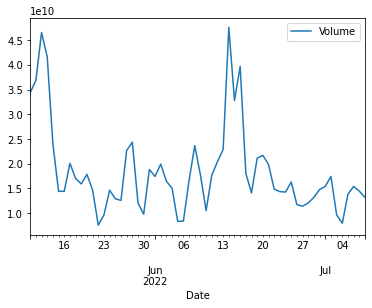

In [19]:
eth.plot()

Pada plot ethereum didapat dari 10 mei 2022 hingga 8 juli 2022 sekitar 2 bulan, didapatkan plot diatas. Pada plot ethereum diatas, didapatkan nilai volume terrtinggi mencapai $47,571,733,027 pada 14 Juni 2022 dan nilai tertinggi kedua ada pada $46,548,009,611 pada 12 Mei 2022. Jika dilihat dari pola 2 bulan terakhir pada garis plot ethereum ini, didapati pola bahwa akan didapati nilai volume tertinggi pada pertengahan bulan (Mei-Juni).Jika melihat nilai volume pada awal bulan seperti 6 Juni 2022 dan 4 Juli 2022 didapati nilai yang rendah dan cenderung mulai menurun pada awal bulan. Berdasarkan dari pola yang terlihat, saya bisa menyimpulkan untuk nilai volume tertinggi cenderung pada pertengahan bulan dan nilai volume terendah ada pada sekitar awal bulan